In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
# 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [3]:
df = pd.read_csv('data/merged_data.csv')

In [4]:
resumetable(df,3)

데이터셋 크기: (20688111, 11)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값
0,event_time,object,0,8782131,2019-10-01 00:00:00+00:00,2019-10-01 00:00:03+00:00,2019-10-01 00:00:07+00:00
1,event_type,object,0,4,cart,cart,cart
2,product_id,int64,0,54565,5773203,5773353,5881589
3,category_id,int64,0,525,1487580005134238553,1487580005134238553,2151191071051219817
4,brand,object,8755357,273,runail,runail,lovely
5,price,float64,0,2855,2.62,2.62,13.48
6,user_id,int64,0,1639151,463240011,463240011,429681830
7,user_session,object,0,4535940,26dd6e6e-4dac-4778-8d2c-92e149dab885,26dd6e6e-4dac-4778-8d2c-92e149dab885,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
8,event_time_moscow,object,0,8782131,2019-10-01 03:00:00+03:00,2019-10-01 03:00:03+03:00,2019-10-01 03:00:07+03:00
9,event_month,float64,11933,5,10.0,10.0,10.0


In [ ]:
# # event_month에 결측치가 있는 행 제거
# df = df[~df['event_month'].isnull()]

In [11]:
# 용량 감소를 위한 event_time drop

In [10]:
df = df.drop(columns=['event_time'])

- event_type

In [14]:
df['event_type'].value_counts()

event_type
view                9657788
cart                5764557
remove_from_cart    3978885
purchase            1286881
Name: count, dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6684\1264040796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='pastel')


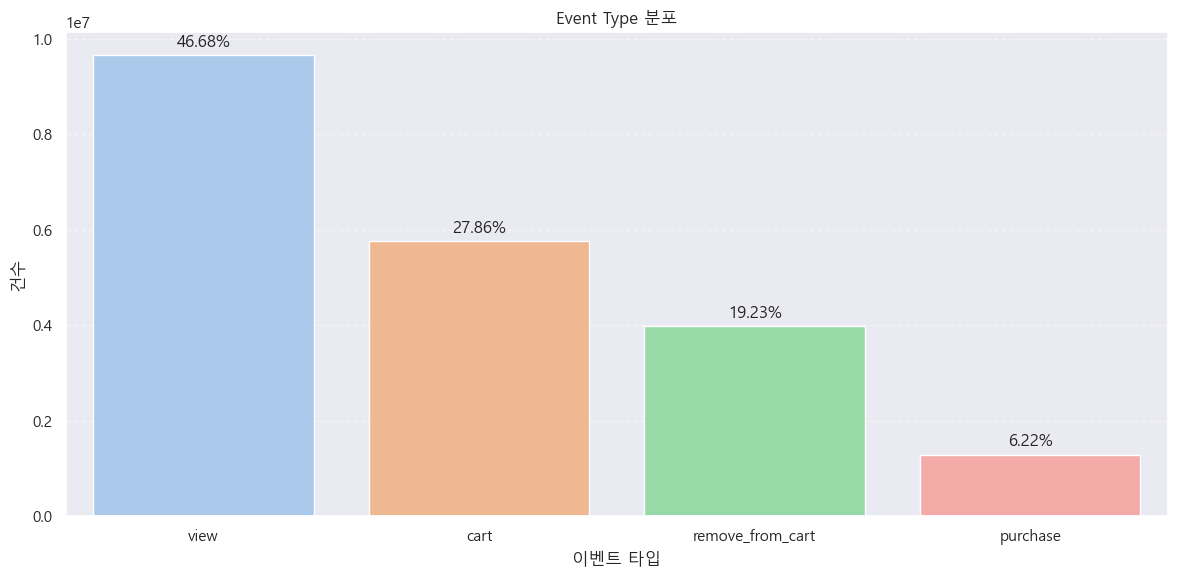

In [15]:
# event_type 개수 및 백분율 계산
event_type_counts = df['event_type'].value_counts()
event_type_percent = event_type_counts / event_type_counts.sum() * 100

# 시각화 (Seaborn 막대그래프)
ax = sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='pastel')
plt.title('Event Type 분포')
plt.xlabel('이벤트 타입')
plt.ylabel('건수')

# 각 막대 위에 백분율 라벨 추가
for i, (count, percent) in enumerate(zip(event_type_counts.values, event_type_percent.values)):
    ax.text(i, count + max(event_type_counts.values)*0.01, f'{percent:.2f}%', 
            ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- event_type은 view, cart, remove_from_cart, purchase 4가지로 이루어져 있다.
- view : 46.68% / cart : 27.86% / remove_from_cart : 19.23% / purchase : 6.22%
- view > cart > remove_from_cart > purchase 순으로 많다.
- 장바구니에서 제거하는 행동인 remove_from_cart도 20%에 가까운 꽤 큰 비율을 보인다.

In [18]:
event_order = ['view', 'cart', 'remove_from_cart', 'purchase']

# describe 결과 생성
event_price_stats = df.groupby('event_type')['price'].describe()

# 인덱스를 원하는 순서로 재정렬
event_price_stats = event_price_stats.reindex(event_order)

# 출력
event_price_stats

,count,mean,std,min,25%,50%,75%,max
event_type,,,,,,,,
view,9657788.0,12.377464,25.634263,0.0,2.81,5.08,10.00,327.78
cart,5764557.0,5.180597,10.524148,0.0,1.59,3.02,5.54,327.78
remove_from_cart,3978885.0,5.232959,10.237500,0.0,1.75,3.33,5.54,327.78
purchase,1286881.0,4.935833,8.916219,0.0,1.59,3.00,5.40,327.78


- view는 가격의 평균이 높지만, cart부터는 급격하게 낮아지는 것을 볼 수 있다.
    - 고가 제품은 구경은 하지만, 담지는 않는다.
    - 편차가 꽤 큰 것으로 보아, 고가 제품도 많이 조회
- cart → purchase에서 평균 가격이 약간 감소한다.
    - 장바구니에 담은 물건 중에서 비교적 비싼 제품을 제외하고, 좀 더 저렴한 제품을 구매하는 경향
- cart, remove_from_cart, purchase의 사분위값이 비슷함
  - 고객의 대다수가 담고, 고민하다가, 구매하는 제품의 가격대는 3.0 안팎, 1.6 ~ 5.5 정도

In [21]:
df['price'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00      0.00
0.25      2.06
0.50      4.05
0.75      7.06
1.00    327.78
Name: price, dtype: float64

In [99]:
# Set으로 바꾸기
view_sessions = set(df[df['event_type'] == 'view']['user_session'])
cart_sessions = set(df[df['event_type'] == 'cart']['user_session'])
purchase_sessions = set(df[df['event_type'] == 'purchase']['user_session'])
remove_sessions = set(df[df['event_type'] == 'remove_from_cart']['user_session'])

# 전환율
view_to_cart = len(view_sessions & cart_sessions) / len(view_sessions)
cart_to_purchase = len(cart_sessions & purchase_sessions) / len(cart_sessions)
view_to_purchase = len(view_sessions & purchase_sessions) / len(view_sessions)

# 이탈률
cart_abandonment_rate = len(cart_sessions & remove_sessions) / len(cart_sessions)
only_cart_sessions = cart_sessions - purchase_sessions
cart_to_purchase_drop_rate = len(only_cart_sessions) / len(cart_sessions)

# 출력
print(f"View → Cart 전환율: {view_to_cart:.2%}")
print(f"Cart → Purchase 전환율: {cart_to_purchase:.2%}")
print(f"View → Purchase 전환율: {view_to_purchase:.2%}")
print(f"Cart → Remove 이탈률: {cart_abandonment_rate:.2%}")
print(f"Cart → 구매 전환 실패율: {cart_to_purchase_drop_rate:.2%}")


View → Cart 전환율: 18.42%
Cart → Purchase 전환율: 12.81%
View → Purchase 전환율: 2.72%
Cart → Remove 이탈률: 39.27%
Cart → 구매 전환 실패율: 87.19%


In [103]:
# 1. 구매가 발생한 세션 추출
purchase_sessions = df[df['event_type'] == 'purchase']['user_session'].unique()

# 2. 해당 세션의 전체 이벤트 추출
funnel_sessions = df[df['user_session'].isin(purchase_sessions)]

# 3. 세션별 event_type 카운트
event_counts = funnel_sessions.groupby('user_session')['event_type'].value_counts().unstack().fillna(0)

# 4. 각 이벤트별 평균 계산
avg_view = event_counts['view'].mean() if 'view' in event_counts.columns else 0
avg_cart = event_counts['cart'].mean() if 'cart' in event_counts.columns else 0
avg_remove = event_counts['remove_from_cart'].mean() if 'remove_from_cart' in event_counts.columns else 0

# 5. 총합 (구매 전 이벤트 수)
avg_pre_purchase_event = avg_view + avg_cart + avg_remove

# 6. 출력
print(f"구매 세션당 평균 view 수: {avg_view:.2f}")
print(f"구매 세션당 평균 cart 수: {avg_cart:.2f}")
print(f"구매 세션당 평균 remove_from_cart 수: {avg_remove:.2f}")
print(f"구매 세션당 평균 '구매 전 이벤트 수' (총합): {avg_pre_purchase_event:.2f}")

구매 세션당 평균 view 수: 6.33
구매 세션당 평균 cart 수: 7.58
구매 세션당 평균 remove_from_cart 수: 5.52
구매 세션당 평균 '구매 전 이벤트 수' (총합): 19.43


In [106]:
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'])

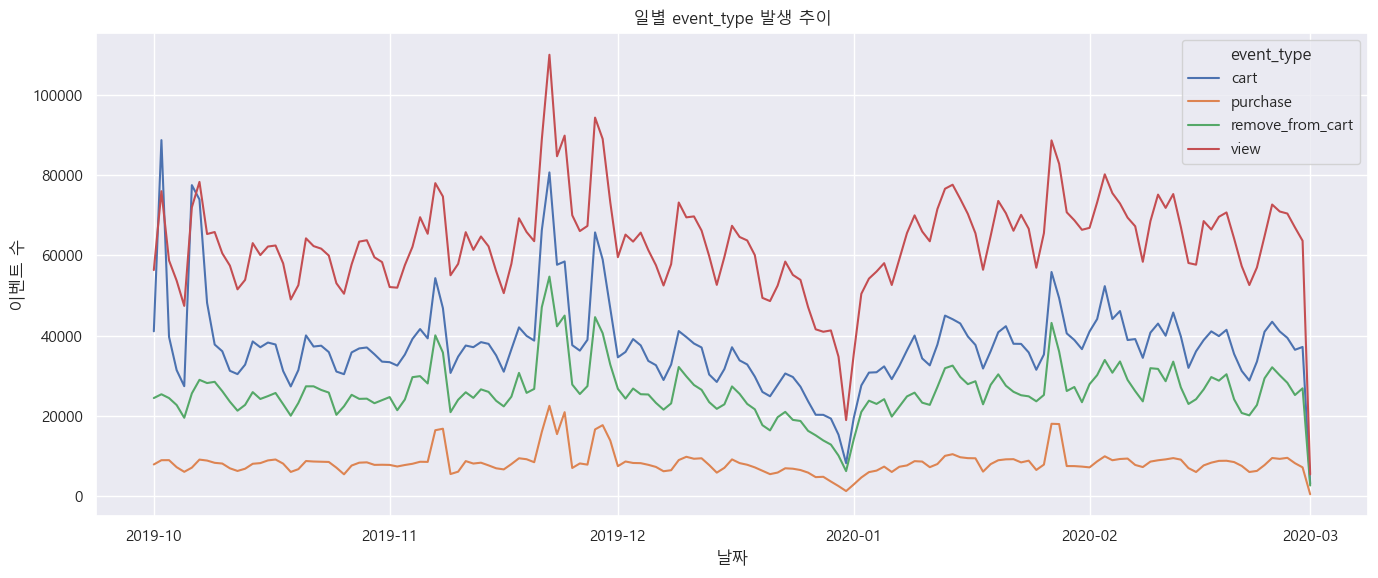

In [107]:
# 1. event_time이 datetime인 경우, 날짜만 추출
df['date'] = df['event_time_moscow'].dt.date  # 일자 기준
# 또는 시간대까지 포함하고 싶으면 dt.floor('D') 또는 dt.to_period('D')

# 2. 이벤트 수 집계
daily_event_counts = df.groupby(['date', 'event_type']).size().unstack().fillna(0)

# 3. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for col in daily_event_counts.columns:
    plt.plot(daily_event_counts.index, daily_event_counts[col], label=col)

plt.title("일별 event_type 발생 추이")
plt.xlabel("날짜")
plt.ylabel("이벤트 수")
plt.legend(title="event_type")
plt.grid(True)
plt.tight_layout()
plt.show()

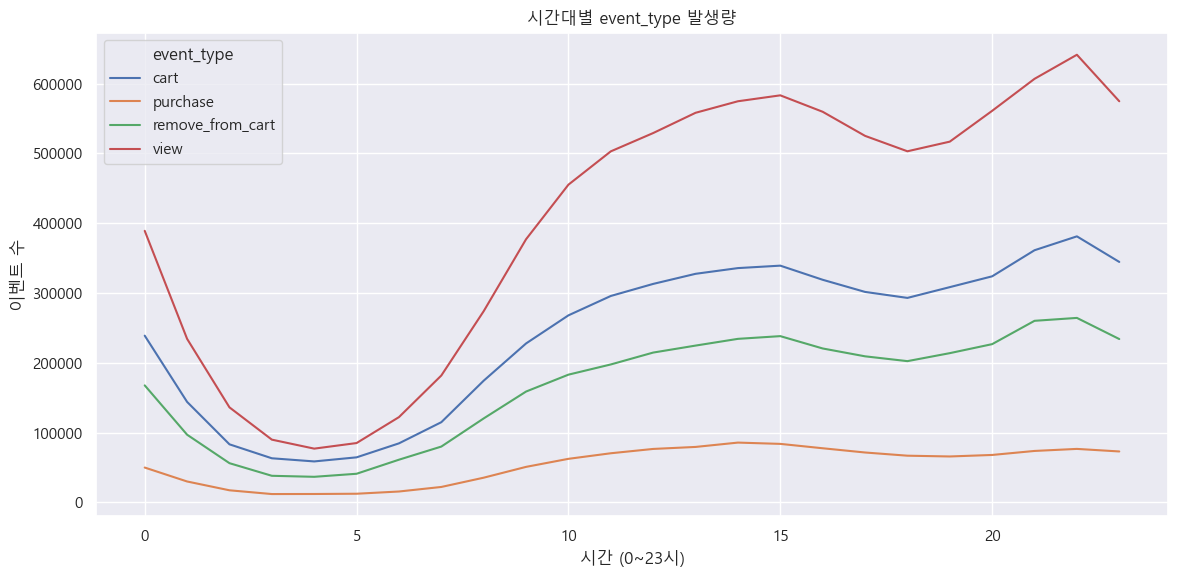

In [109]:
# 시간대 추출
df['hour'] = df['event_time_moscow'].dt.hour

# 시간별 event_type 수
hourly_event_counts = df.groupby(['hour', 'event_type']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
for col in hourly_event_counts.columns:
    plt.plot(hourly_event_counts.index, hourly_event_counts[col], label=col)

plt.title("시간대별 event_type 발생량")
plt.xlabel("시간 (0~23시)")
plt.ylabel("이벤트 수")
plt.legend(title="event_type")
plt.grid(True)
plt.tight_layout()
plt.show()

---

user_session에서는 user_session별 가격이 0인 값이 많은 것들은 제거, 
price 관련은 무시
product 분석도 무시

어느 전까지는 그냥 자르고
애매한 건 시간 확인해서 시간 1초만이면 제거